## Housing Price Prediction for Surprise Housing Company

#### Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know the following things about the prospective properties:
1. Which variables are significant in predicting the price of a house, and
2. How well those variables describe the price of a house.
3. Also, determine the optimal value of lambda for ridge and lasso regression.

In [1]:
# Import required libraries

# Import library to filter warning
import warnings
warnings.filterwarnings('ignore')

# Import datetime library
from datetime import date

# Import libraries for numerical and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Import libraries for scalling the independent featurs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Import libraries for model building - dataset spliting, feature selection, cross validation etc.
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Import libraries for different metrics check for model goodness
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Set max rows and columns display options
pd.set_option("display.max_rows",10000)
pd.set_option("display.max_columns",500)

# Reset matplotlib style
%matplotlib inline

#### Step 1: Reading the data and understanding variables:

In [2]:
# Reading the data from train.csv file

housing = pd.read_csv('train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
housing.shape

(1460, 81)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Step 2: Data Inspection and Cleaning:

In [5]:
# we can see that some columns has null values 
#checking the percentages of null values present in each column
null_columns = housing.columns[housing.isnull().sum()>0]
round(housing[null_columns].isnull().sum()/len(housing.index)*100,2).sort_values(ascending=False)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

In [6]:
# Dropping the PoolQC,MiscFeature,Alley,Fence and FireplaceQu columns as they are having null values more than 30%

housing.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [7]:
housing.shape

(1460, 76)

In [8]:
null_columns = housing.columns[housing.isnull().sum()>0]
round(housing[null_columns].isnull().sum()/len(housing.index)*100,2).sort_values(ascending=False)

LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
dtype: float64

In [9]:
#Filling appropriate values for the remaining columns in place of missing values 
housing['GarageType'] = housing['GarageType'].fillna('NA')
housing['GarageFinish'] = housing['GarageFinish'].fillna('NA')
housing['GarageQual'] = housing['GarageQual'].fillna('NA')
housing['GarageCond'] = housing['GarageCond'].fillna('NA')
housing['BsmtExposure'] = housing['BsmtExposure'].fillna('NA')
housing['BsmtFinType2'] = housing['BsmtFinType2'].fillna('NA')
housing['BsmtQual'] = housing['BsmtQual'].fillna('NA')
housing['BsmtCond'] = housing['BsmtCond'].fillna('NA')
housing['BsmtFinType1'] = housing['BsmtFinType1'].fillna('NA')
housing['MasVnrType'] = housing['MasVnrType'].fillna('None')
housing['Electrical'] = housing['Electrical'].fillna('SBrkr')

In [10]:
# Filling the missing values with median since these three are numerical columns
housing['LotFrontage'] = housing['LotFrontage'].fillna(housing['LotFrontage'].median())
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(housing['GarageYrBlt'].median())
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(housing['MasVnrArea'].median())

In [11]:
# Dropping Id column as it is just an index
housing.drop(['Id'],axis=1,inplace=True)

In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [13]:
housing.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [14]:
# we can see the CentralAir column has 2 values Y and N so imputing them as 1 and 0 respectively
housing['CentralAir'] = housing['CentralAir'].apply(lambda x: 1 if x=='Y' else 0)

In [15]:
housing.shape

(1460, 75)

In [16]:
#Dropping the YrSold,MoSold,GarageYrBlt,YearRemodAdd Columns as it doesn't have any impact in computing SalePrice
housing.drop(['YrSold','MoSold','GarageYrBlt','YearRemodAdd'],axis=1,inplace=True)

In [17]:
# we are checking the skewness in categorical columns
cat_col = housing.select_dtypes(include=['object'])

In [18]:
for col in cat_col:
    print(housing[col].value_counts(normalize=True))

RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.

In [19]:
# separating the columns which are having skewness above 90%
skew_col = ['PavedDrive','GarageCond','Functional','Electrical','Heating','RoofMatl','Condition2','LandSlope','Utilities','Street']

In [20]:
#dropping those columns which have skewness above 90% 
housing.drop(skew_col,axis=1,inplace=True)

In [21]:
housing.shape

(1460, 61)

In [22]:
#Creating dervied column built_age like how many years old from today 
housing['built_Age'] = date.today().year - housing.YearBuilt
housing.drop(['YearBuilt'],axis=1,inplace=True)

In [23]:
num_col = housing.select_dtypes(include=['int64','float64'])
cat_col = housing.select_dtypes(include=['object'])

In [24]:
cat_col.shape

(1460, 27)

In [25]:
num_col.shape

(1460, 34)

#### Step 3: EDA

##### Plotting numerical columns:

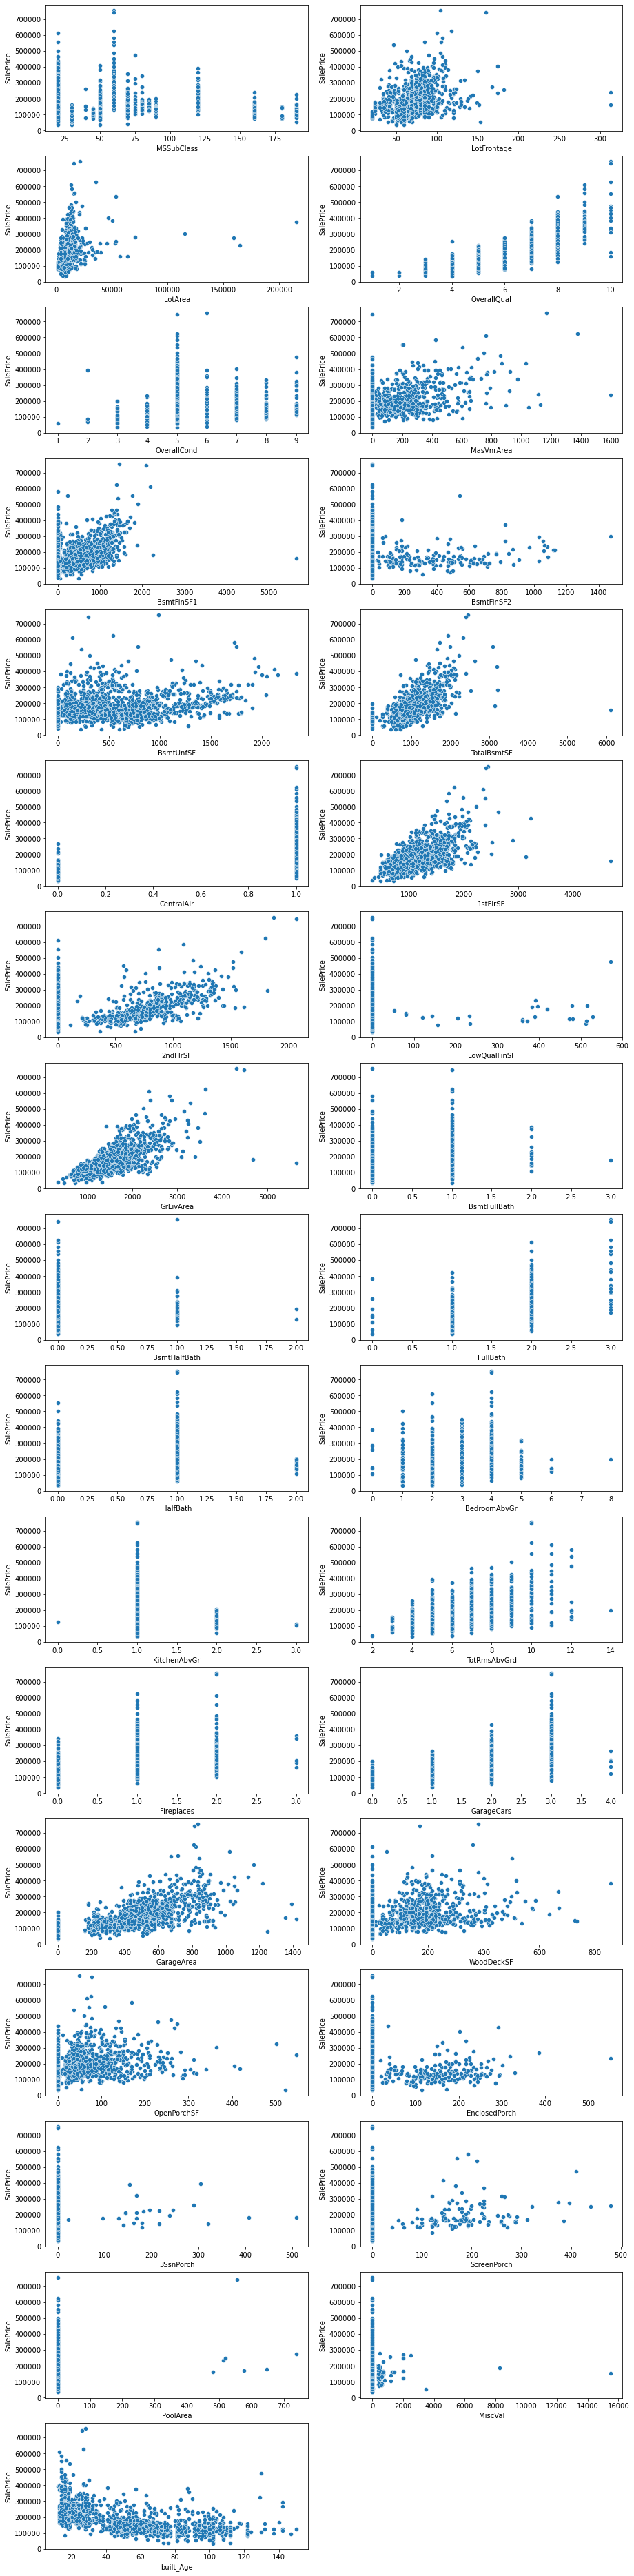

In [26]:
count=1
f, axs = plt.subplots(2,2,figsize=(15,15))
f.set_figheight(80)
f.set_figwidth(15)
for i in num_col.columns:
    if i!='SalePrice':
        plt.subplot(20,2,count)
        sns.scatterplot(housing[i],housing["SalePrice"])
        count+=1
plt.show()

We can see that LotFrontage,OpenPorschSF,GarageArea,WoodDeckSF,GRLivArea,2ndFloorSF,1stFloorSF,TotalBsmtSF,BsmtUnfSf,LotArea have linear relationship with SalePrice.

##### Plotting Categorical Columns:

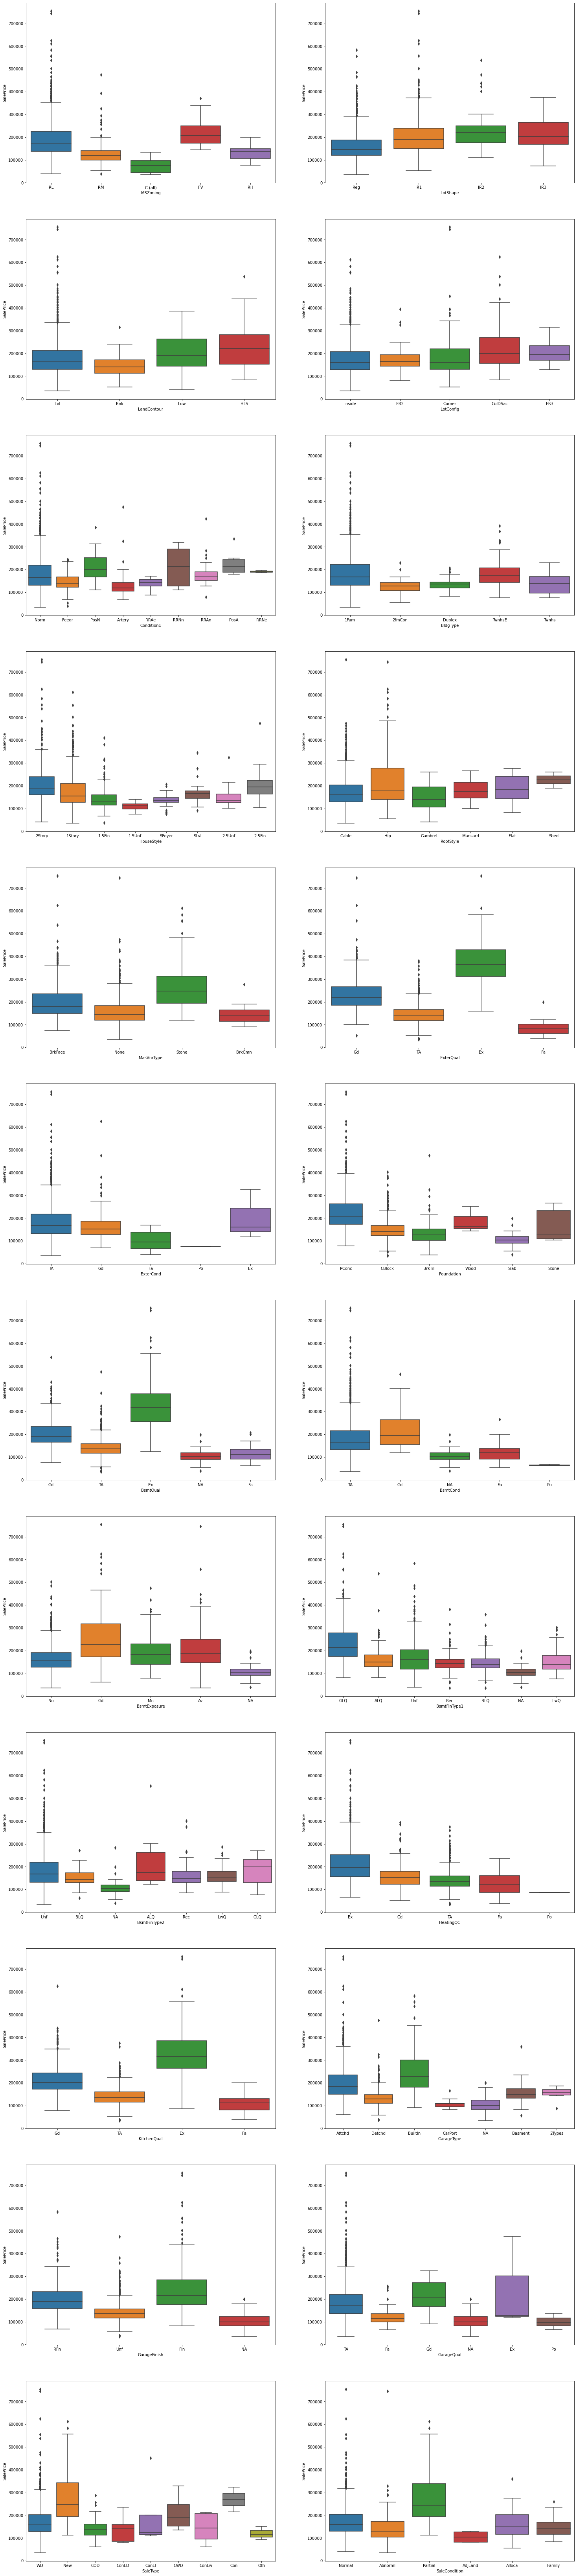

<AxesSubplot:xlabel='Exterior2nd', ylabel='SalePrice'>

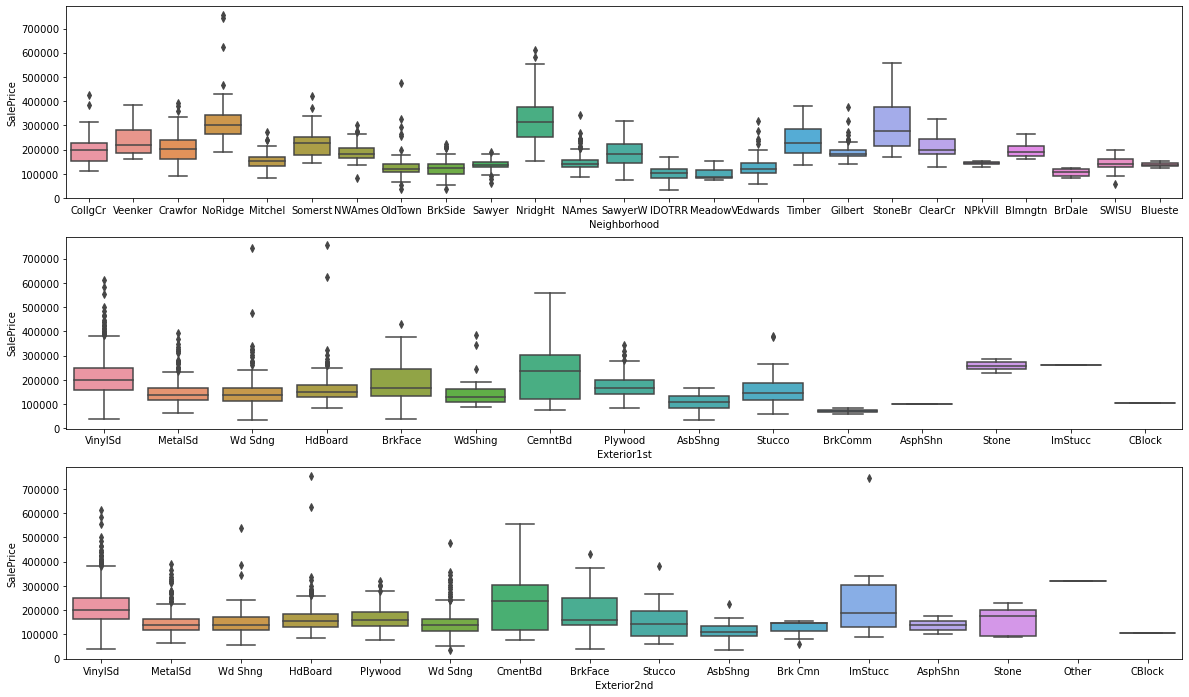

In [27]:
count=1
f, axs = plt.subplots(2,2,figsize=(40,20))
f.set_figheight(150)
f.set_figwidth(25)
for i in cat_col.columns:
    if i!='Neighborhood'and i!='Exterior1st'and i!='Exterior2nd':
        plt.subplot(15,2,count)
        sns.boxplot(housing[i],housing["SalePrice"])
        count+=1
plt.show()

plt.figure(figsize=(20,12))
plt.subplot(3,1,1)
sns.boxplot(housing['Neighborhood'],housing["SalePrice"])
plt.subplot(3,1,2)
sns.boxplot(housing['Exterior1st'],housing["SalePrice"])
plt.subplot(3,1,3)
sns.boxplot(housing['Exterior2nd'],housing["SalePrice"])

Inferences:
   1. Residential Low Density has higher SalePrices
   2. Northridge Heights has higher SalePrices
   3. Home just constructed and sold has higher SalePrices
   4. Houses with Kitchen Quality excellent has higher Sale Prices

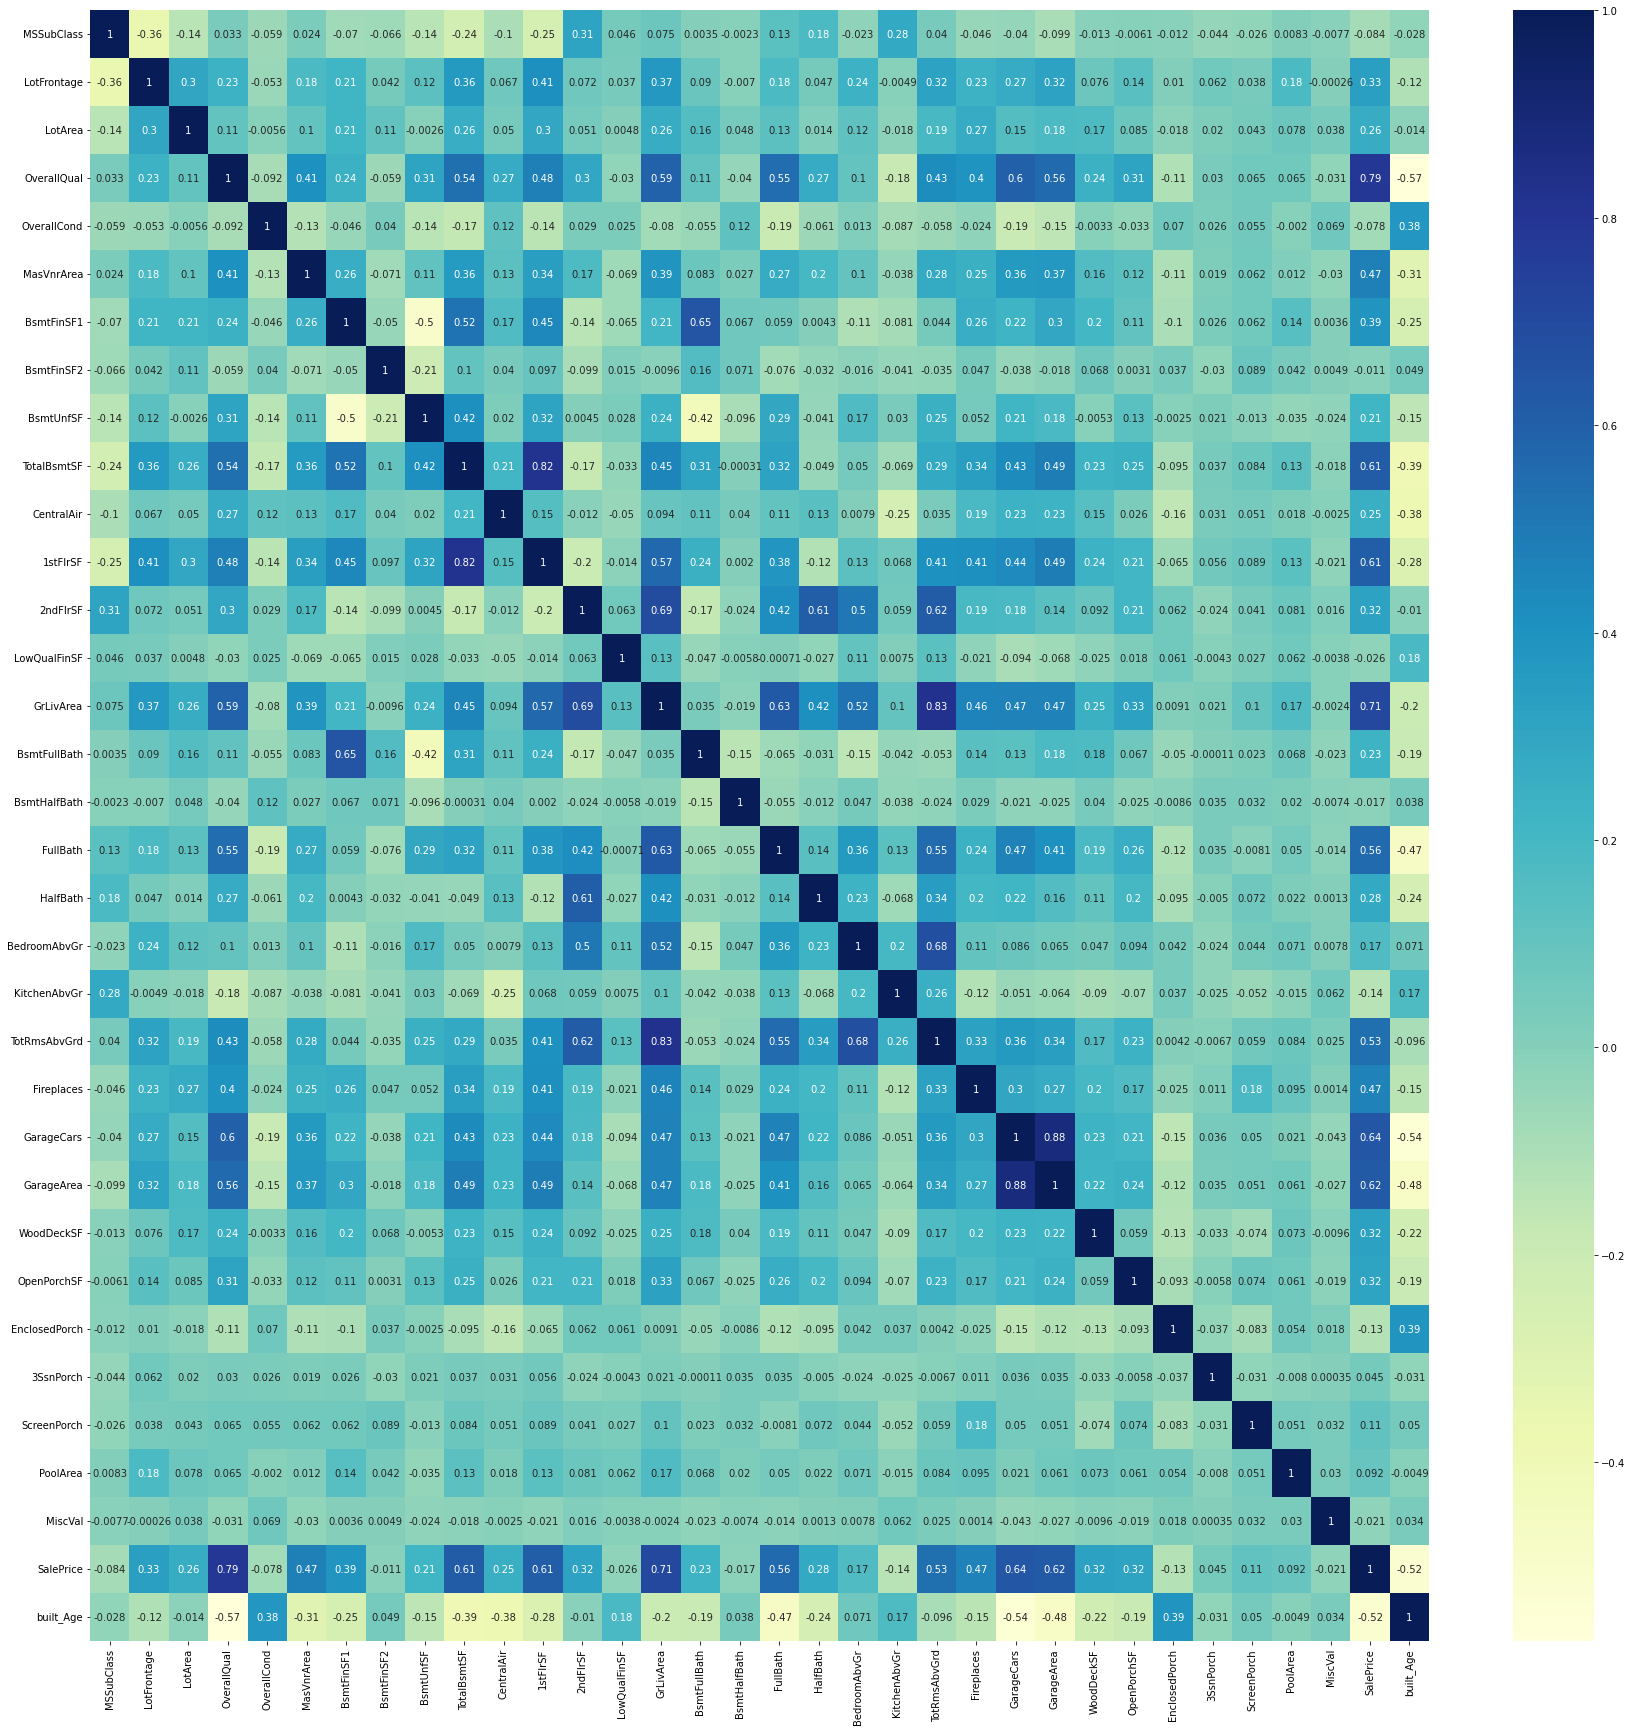

In [28]:
plt.figure(figsize = (30,30))
sns.heatmap(housing.corr(),annot=True,cmap = "YlGnBu")
plt.show()

We can see that OverallQual,GrLivArea,TotalBsmtSF,1stFlrSF,FullBath,GarageCars,GarageArea are positively correlated.
 and builtAge is negatively correlated to SalePrice

#### Step 4: Preparing the Date for Model Building:

<AxesSubplot:xlabel='SalePrice'>

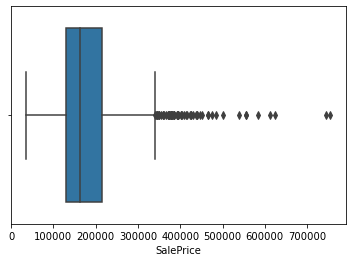

In [29]:
# plotting boxplot for SalePrice
sns.boxplot(housing.SalePrice)

<AxesSubplot:xlabel='SalePrice'>

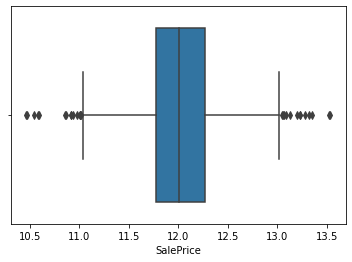

In [30]:
#we can see there are some outliers in SalePrice so doing a log Tranformation 
housing['SalePrice'] = np.log(housing.SalePrice)
sns.boxplot(housing.SalePrice)

In [31]:
cat_col = housing.select_dtypes(include=['object'])

In [32]:
# Creating dummy variables for categorical columns
dummy = pd.get_dummies(housing[cat_col.columns],drop_first = True)
dummy.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,

In [33]:
#adding the created dummy columns to the dataframe
housing = pd.concat([housing,dummy],axis=1)

In [34]:
# removing the columns for which we have created dummies
housing = housing.drop(housing[cat_col.columns],axis=1)

In [35]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 198 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(31), uint8(164)
memory usage: 621.8 KB


#### Step 5: Splitting the Data to Train and Test Sets:

In [36]:
housing_train,housing_test = train_test_split(housing,train_size=0.7,random_state=100)

In [37]:
housing_train.shape

(1021, 198)

In [38]:
housing_test.shape

(439, 198)

In [39]:
y_train = housing_train.pop('SalePrice')
x_train = housing_train

In [40]:
y_test = housing_test.pop('SalePrice')
x_test = housing_test

In [41]:
## using the Standard Scaler
scaler = StandardScaler()

In [42]:
num_train_col = x_train.select_dtypes(include=['int64','float64']).columns

In [43]:
#Scaling the numerical columns present in both training and testing sets
x_train[num_train_col] = scaler.fit_transform(x_train[num_train_col])
x_test[num_train_col] = scaler.transform(x_test[num_train_col])

 #### Step 6 : Model Building using Linear Regression and RFE:

In [44]:
linearReg = LinearRegression()
#Taking 75 columns for RFE
rfe = RFE(linearReg,75)
rfe = rfe.fit(x_train,y_train)

In [45]:
linearReg.fit(x_train, y_train)

# predict train
y_train_pred = linearReg.predict(x_train)
linear_mse_train = mean_squared_error(y_train, y_train_pred)
linear_rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
linear_r2_score_train = r2_score(y_train, y_train_pred)
print('MSE:', linear_mse_train)
print('RMSE:', linear_rmse_train)
print('R2 Score:', linear_r2_score_train)

MSE: 0.011708219014624247
RMSE: 0.10820452400257694
R2 Score: 0.9254938668519217


In [46]:
# predict test
y_test_pred = linearReg.predict(x_test)
linear_mse_test = mean_squared_error(y_test, y_test_pred)
linear_rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
linear_r2_score_test = r2_score(y_test, y_test_pred)
print('MSE:', linear_mse_test)
print('RMSE:', linear_rmse_test)
print('R2 Score:', linear_r2_score_test)

MSE: 4.269290633961809e+18
RMSE: 2066226181.7046576
R2 Score: -2.5903567289667973e+19


In [47]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 47),
 ('LotFrontage', False, 69),
 ('LotArea', False, 67),
 ('OverallQual', True, 1),
 ('OverallCond', False, 30),
 ('MasVnrArea', False, 107),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('CentralAir', False, 78),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 42),
 ('BsmtHalfBath', False, 104),
 ('FullBath', False, 83),
 ('HalfBath', False, 99),
 ('BedroomAbvGr', False, 65),
 ('KitchenAbvGr', False, 81),
 ('TotRmsAbvGrd', False, 74),
 ('Fireplaces', False, 57),
 ('GarageCars', False, 24),
 ('GarageArea', False, 110),
 ('WoodDeckSF', False, 89),
 ('OpenPorchSF', False, 119),
 ('EnclosedPorch', False, 95),
 ('3SsnPorch', False, 102),
 ('ScreenPorch', False, 97),
 ('PoolArea', False, 93),
 ('MiscVal', False, 122),
 ('built_Age', False, 38),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZ

In [48]:
#these  are the columns selected using RFE
col = x_train.columns[rfe.support_]
col

Index(['OverallQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'Neighborhood_Blueste', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_NPkVill',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_Norm',
       'Condition1_PosA', 'Condition1_RRAn', 'Condition1_RRNn',
       'BldgType_Twnhs', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_HdBoard',
       'Exterior1st_ImStucc', 'Exterior1st_Plywood', 'Exterior1st_WdShing',
       'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_CBlock',
       'Exterior2nd_CmentBd', 'Exterior2nd_

In [49]:
x_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea',
       'CentralAir', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       ...
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal'],
      dtype='object', length=122)

In [50]:
x_train_rfe = x_train[col]
x_train_rfe.shape

(1021, 75)

#### Step 7: Model Building and Tuning Hyper Parameter using Ridge Regression

In [51]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_grid_search = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_grid_search.fit(x_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [52]:
print(ridge_grid_search.best_params_)

{'alpha': 0.6}


In [53]:
# getting the results into a dataframe for better view
df_ridge = pd.DataFrame(ridge_grid_search.cv_results_)
df_ridge

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004801,0.003920,0.003200,0.003919,0.0001,{'alpha': 0.0001},-0.101937,-0.105445,-0.112726,-0.092800,-0.102759,-0.103133,0.006414,17,-0.095657,-0.085952,-0.090919,-0.097369,-0.094671,-0.092914,0.004072
1,0.000358,0.000715,0.000000,0.000000,0.001,{'alpha': 0.001},-0.101936,-0.105445,-0.112721,-0.092785,-0.102760,-0.103129,0.006418,16,-0.095657,-0.085953,-0.090920,-0.097369,-0.094671,-0.092914,0.004072
2,0.004232,0.006092,0.002104,0.004209,0.01,{'alpha': 0.01},-0.101925,-0.105453,-0.112675,-0.092639,-0.102769,-0.103092,0.006452,15,-0.095656,-0.085965,-0.090931,-0.097377,-0.094667,-0.092919,0.004068
3,0.000969,0.001937,0.003579,0.006158,0.05,{'alpha': 0.05},-0.101876,-0.105477,-0.112503,-0.092050,-0.102799,-0.102941,0.006597,12,-0.095651,-0.086021,-0.090980,-0.097410,-0.094650,-0.092942,0.004049
4,0.003126,0.006252,0.000000,0.000000,0.1,{'alpha': 0.1},-0.101810,-0.105492,-0.112342,-0.091410,-0.102820,-0.102775,0.006768,10,-0.095644,-0.086098,-0.091035,-0.097452,-0.094635,-0.092973,0.004025
5,0.001603,0.003207,0.001617,0.003234,0.2,{'alpha': 0.2},-0.101669,-0.105504,-0.112459,-0.090711,-0.102836,-0.102636,0.007041,6,-0.095633,-0.086232,-0.091118,-0.097544,-0.094652,-0.093036,0.003991
6,0.000000,0.000000,0.003125,0.006249,0.3,{'alpha': 0.3},-0.101541,-0.105507,-0.112672,-0.090575,-0.102836,-0.102626,0.007151,4,-0.095669,-0.086355,-0.091192,-0.097681,-0.094684,-0.093116,0.003981
7,0.006251,0.007656,0.000000,0.000000,0.4,{'alpha': 0.4},-0.101412,-0.105503,-0.112818,-0.090556,-0.102811,-0.102620,0.007202,3,-0.095779,-0.086483,-0.091256,-0.097797,-0.094758,-0.093215,0.003978
8,0.000000,0.000000,0.002804,0.005608,0.5,{'alpha': 0.5},-0.101296,-0.105495,-0.112940,-0.090577,-0.102777,-0.102617,0.007233,2,-0.095884,-0.086602,-0.091314,-0.097898,-0.094831,-0.093306,0.003974
9,0.000403,0.000806,0.003129,0.006259,0.6,{'alpha': 0.6},-0.101191,-0.105498,-0.113031,-0.090593,-0.102734,-0.102609,0.007258,1,-0.095975,-0.086714,-0.091375,-0.097989,-0.094897,-0.093390,0.003968


In [54]:
ridge_best = ridge_grid_search.best_estimator_
ridge_best

Ridge(alpha=0.6)

In [55]:
ridge_grid_search.best_score_

-0.10260925123705048

In [56]:
ridge_alpha = ridge_grid_search.best_params_
ridge_alpha

{'alpha': 0.6}

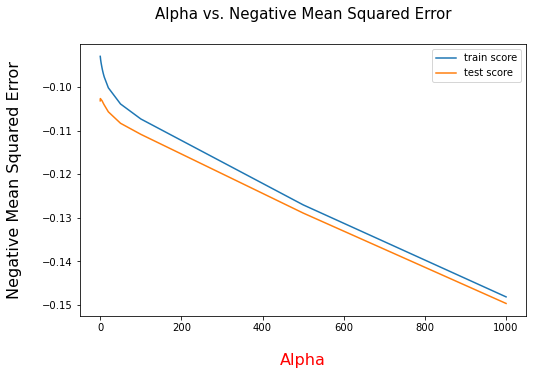

In [57]:
# plotting the graph for test and train scores
plt.figure(figsize=(8,5))
plt.plot(df_ridge['param_alpha'].astype('float32'), df_ridge['mean_train_score'])
plt.plot(df_ridge['param_alpha'].astype('float32'), df_ridge['mean_test_score'])
# Setting axis label and display parameters
plt.xlabel('Alpha',fontsize = 16, color = 'red', labelpad = 20)
plt.ylabel('Negative Mean Squared Error',fontsize = 16, color = 'black', labelpad = 20)    
# Setting title of the plot
plt.title("Alpha vs. Negative Mean Squared Error",color='black',fontsize=15, pad = 25)
plt.legend(['train score', 'test score'], loc='upper right')
# Showing the plot using matplotlib.pyplot show() function 
plt.show()

In [58]:
#fitting the model for train data using the ridge_best model with alpha as 0.6
ridge_best.fit(x_train_rfe, y_train)
y_train_predicted = ridge_best.predict(x_train_rfe)

In [59]:
ridge_mse_train = mean_squared_error(y_train, y_train_predicted)
ridge_rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
ridge_r2_score_train = r2_score(y_train, y_train_predicted)
print('MSE:', ridge_mse_train)
print('RMSE:', ridge_rmse_train)
print('R2 Score:', ridge_r2_score_train)

MSE: 0.01834858657619168
RMSE: 0.13545695469850075
R2 Score: 0.8832373879565104


In [60]:
ridge_coef_df = pd.DataFrame()
# Getting the model coefficients
ridge_coef = list(ridge_best.coef_)
# Creating 'Features' column of dataframe and populating data
ridge_coef_df['Features'] = x_train_rfe.columns
# Creating 'Coefficient' column of dataframe and populating data 
ridge_coef_df['Coefficient'] = ridge_coef
# Diaplaying the dataframe of Regression model parameters
ridge_coef_df

,Features,Coefficient
0,OverallQual,0.109680
1,BsmtFinSF1,-0.001197
2,BsmtFinSF2,0.003059
3,BsmtUnfSF,-0.003997
4,TotalBsmtSF,-0.003981
5,1stFlrSF,0.066820
6,2ndFlrSF,0.041954
7,LowQualFinSF,-0.000806
8,GrLivArea,0.084271
9,MSZoning_FV,0.299349


In [61]:
print('Intercept of Ridge Regression Model: ', ridge_best.intercept_)

Intercept of Ridge Regression Model:  11.489934838066938


In [62]:
# getting the top 10 features 
ridge_coef_df.reindex(ridge_coef_df['Coefficient'].abs().sort_values(ascending=False).index).head(10)

,Features,Coefficient
11,MSZoning_RL,0.407450
10,MSZoning_RH,0.343567
9,MSZoning_FV,0.299349
12,MSZoning_RM,0.297230
49,ExterCond_Fa,-0.226783
53,Foundation_Stone,0.202946
15,LandContour_Low,0.178712
25,Neighborhood_Somerst,0.173791
47,Exterior2nd_VinylSd,0.165484
27,Neighborhood_Veenker,0.163542


In [63]:
x_test_rfe = x_test[col]

In [64]:
#fitting the model for test data using the ridge_best model with alpha as 0.6
y_test_predicted = ridge_best.predict(x_test_rfe)

In [65]:
ridge_mse_test = mean_squared_error(y_test, y_test_predicted)
ridge_rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predicted))
ridge_r2_score_test = r2_score(y_test, y_test_predicted)
print('MSE:', ridge_mse_test)
print('RMSE:', ridge_rmse_test)
print('R2 Score:', ridge_r2_score_test)

MSE: 0.025502421854975393
RMSE: 0.15969477716874586
R2 Score: 0.8452661677996777


Text(0, 0.5, 'y_test_predicted')

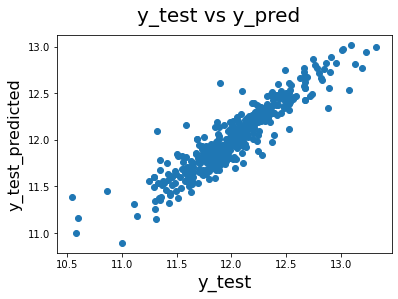

In [66]:
fig = plt.figure()
plt.scatter(y_test, y_test_predicted)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_predicted', fontsize = 16)

Text(0, 0.5, 'Sales Price')

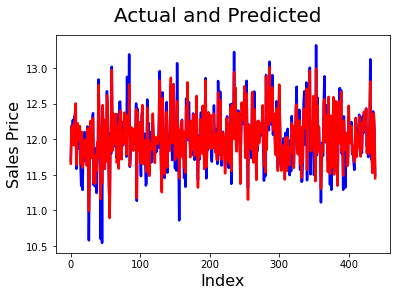

In [67]:
fig = plt.figure()
c = [i for i in range(0,y_test.shape[0],1)]
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_predicted, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16)                         # Y-label

#### Lasso Regression

In [68]:
from sklearn.linear_model import Lasso

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
lasso_grid_search = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_grid_search.fit(x_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [69]:
#adding the results into a dataframe for best view
df_lasso = pd.DataFrame(lasso_grid_search.cv_results_)
df_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.033775,0.003708,0.002742,0.005484,0.0001,{'alpha': 0.0001},-0.101463,-0.105960,-0.113036,-0.091101,-0.102892,-0.102891,0.007119,1,-0.095854,-0.086833,-0.091507,-0.097972,-0.095005,-0.093434,0.003904
1,0.013199,0.005300,0.001642,0.003284,0.001,{'alpha': 0.001},-0.100650,-0.112921,-0.116490,-0.100370,-0.102231,-0.106532,0.006798,2,-0.102315,-0.093956,-0.097263,-0.103602,-0.102168,-0.099861,0.003659
2,0.003089,0.003960,0.000114,0.000228,0.01,{'alpha': 0.01},-0.117479,-0.131899,-0.125329,-0.121918,-0.123231,-0.123971,0.004725,3,-0.125339,-0.111644,-0.121084,-0.123047,-0.123728,-0.120969,0.004858
3,0.006293,0.007709,0.000000,0.000000,0.05,{'alpha': 0.05},-0.145332,-0.153734,-0.148254,-0.148076,-0.147418,-0.148563,0.002787,4,-0.150740,-0.136429,-0.146881,-0.149659,-0.151955,-0.147133,0.005609
4,0.003127,0.006254,0.000000,0.000000,0.1,{'alpha': 0.1},-0.169612,-0.178498,-0.169646,-0.170664,-0.173759,-0.172436,0.003388,5,-0.172948,-0.165664,-0.170794,-0.171402,-0.176249,-0.171412,0.003440


In [70]:
lasso_best = lasso_grid_search.best_estimator_
lasso_best

Lasso(alpha=0.0001)

In [71]:
print(lasso_grid_search.best_params_)

{'alpha': 0.0001}


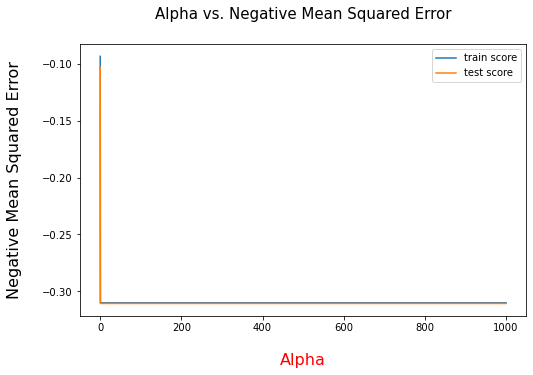

In [72]:
plt.figure(figsize=(8,5))
plt.plot(df_lasso['param_alpha'].astype('float32'), df_lasso['mean_train_score'])
plt.plot(df_lasso['param_alpha'].astype('float32'), df_lasso['mean_test_score'])
# Setting axis label and display parameters
plt.xlabel('Alpha',fontsize = 16, color = 'red', labelpad = 20)
plt.ylabel('Negative Mean Squared Error',fontsize = 16, color = 'black', labelpad = 20)    
# Setting title of the plot
plt.title("Alpha vs. Negative Mean Squared Error",color='black',fontsize=15, pad = 25)
plt.legend(['train score', 'test score'], loc='upper right')
# Showing the plot using matplotlib.pyplot show() function 
plt.show()

In [73]:
lasso_best.fit(x_train_rfe,y_train)

Lasso(alpha=0.0001)

In [74]:
y_train_predicted = lasso_best.predict(x_train_rfe)

In [75]:
print('Intercept of Lasso Regression Model: ', lasso_best.intercept_)

Intercept of Lasso Regression Model:  11.41375193032373


In [76]:
lasso_mse_train = mean_squared_error(y_train, y_train_predicted)
lasso_rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
lasso_r2_score_train = r2_score(y_train, y_train_predicted)
print('MSE:', lasso_mse_train)
print('RMSE:', lasso_rmse_train)
print('R2 Score:', lasso_r2_score_train)

MSE: 0.01833476306416018
RMSE: 0.13540591960531187
R2 Score: 0.8833253549160204


In [77]:
lasso_coef_df = pd.DataFrame()
# Getting the model coefficients
lasso_coef = list(lasso_best.coef_)
# Creating 'Features' column of dataframe and populating data
lasso_coef_df['Features'] = x_train_rfe.columns
# Creating 'Coefficient' column of dataframe and populating data 
lasso_coef_df['Coefficient'] = lasso_coef
# Diaplaying the dataframe of Regression model parameters
lasso_coef_df

,Features,Coefficient
0,OverallQual,0.110265
1,BsmtFinSF1,-0.000000
2,BsmtFinSF2,0.003241
3,BsmtUnfSF,-0.003888
4,TotalBsmtSF,-0.003088
5,1stFlrSF,0.074113
6,2ndFlrSF,0.050605
7,LowQualFinSF,0.000364
8,GrLivArea,0.073116
9,MSZoning_FV,0.367008


In [78]:
#getting the best 10 coeffecients
lasso_coef_df.reindex(lasso_coef_df['Coefficient'].abs().sort_values(ascending=False).index).head(10)

,Features,Coefficient
11,MSZoning_RL,0.469723
10,MSZoning_RH,0.411691
9,MSZoning_FV,0.367008
12,MSZoning_RM,0.358369
49,ExterCond_Fa,-0.213149
53,Foundation_Stone,0.205255
15,LandContour_Low,0.180560
25,Neighborhood_Somerst,0.170022
72,SaleType_ConLD,0.165090
56,BsmtQual_NA,-0.162557


In [79]:
# predicting the values using test data with alpha as 0.0001
y_test_lasso_pred = lasso_best.predict(x_test_rfe)

In [80]:
lasso_mse_test = mean_squared_error(y_test, y_test_lasso_pred)
lasso_rmse_test = np.sqrt(mean_squared_error(y_test, y_test_lasso_pred))
lasso_r2_score_test = r2_score(y_test, y_test_lasso_pred)
print('MSE:', lasso_mse_test)
print('RMSE:', lasso_rmse_test)
print('R2 Score:', lasso_r2_score_test)

MSE: 0.025247816669719966
RMSE: 0.15889561564033153
R2 Score: 0.8468109636718768


Text(0, 0.5, 'y_test_predicted')

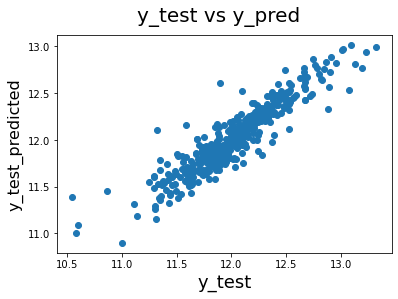

In [81]:
fig = plt.figure()
plt.scatter(y_test, y_test_lasso_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_predicted', fontsize = 16)

Text(0, 0.5, 'Sales Price')

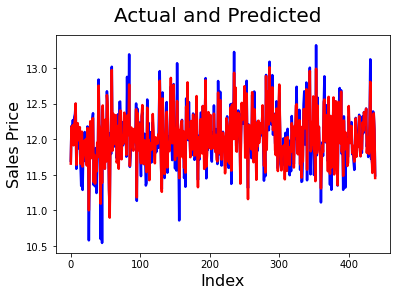

In [82]:
fig = plt.figure()
c = [i for i in range(0,y_test.shape[0],1)]
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_lasso_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16)                         # Y-label

#### Final Result:

#### Scores of Linear Regression Model

In [83]:
data = {'Train':[linear_mse_train,linear_rmse_train,linear_r2_score_train],
        'Test':[linear_mse_test, linear_rmse_test,linear_r2_score_test]}
df_scores = pd.DataFrame(data,index=['MSE','RMSE','R2Score'])
df_scores

,Train,Test
MSE,0.011708,4.269291e+18
RMSE,0.108205,2.066226e+09
R2Score,0.925494,-2.590357e+19


In [84]:
data = {'Train':[ridge_mse_train,ridge_rmse_train,ridge_r2_score_train],
        'Test':[ridge_mse_test, ridge_rmse_test,ridge_r2_score_test]}
df_ridge_scores = pd.DataFrame(data,index=['Ridge_MSE','Ridge_RMSE','Ridge_R2Score'])
df_ridge_scores

,Train,Test
Ridge_MSE,0.018349,0.025502
Ridge_RMSE,0.135457,0.159695
Ridge_R2Score,0.883237,0.845266


In [85]:
data = {'Train':[lasso_mse_train,lasso_rmse_train,lasso_r2_score_train],
        'Test':[lasso_mse_test, lasso_rmse_test,lasso_r2_score_test]}
df_lasso_scores = pd.DataFrame(data,index=['Lasso_MSE','Lasso_RMSE','Lasso_R2Score'])
df_lasso_scores

,Train,Test
Lasso_MSE,0.018335,0.025248
Lasso_RMSE,0.135406,0.158896
Lasso_R2Score,0.883325,0.846811


#### Interpretation of coeffecients using Ridge regression:(Alpha:0.6)

1. MSZoning_RL: A unit increase in MSZoning_RL increases SalePrice by 0.407450 units.
2. MSZoning_RH: A unit increase in MSZoning_RH increases SalePrice by 0.343567 units.	 
3. MSZoning_FV: A unit increase in MSZoning_FV increases SalePrice by 0.299349 units.	            
4. MSZoning_RM:	A unit increase in MSZoning_RM increases SalePrice by 0.297230 units.            
5. ExterCond_Fa:A unit increase in ExterCond_Fa decreases SalePrice by 0.226783 units.        
6. Foundation_Stone:A unit increase in Foundation_Stone increases SalePrice by 0.202946 units.	       
7. LandContour_Low:A unit increase in LandContour_Low increases SalePrice by 0.178712 units.	        
8. Neighborhood_Somerst:A unit increase in Neighborhood_Somerst increases SalePrice by 0.173791 units.	
9. Exterior2nd_VinylSd:A unit increase in Exterior2nd_VinylSd increases SalePrice by 0.165484 units.	        
10. Neighborhood_Veenker:A unit increase in Neighborhood_Veenker increases SalePrice by 0.163542 units.	           

#### Interpretation of coeffecients using Lasso regression: (Alpha:0.0001)

1. MSZoning_RL: A unit increase in MSZoning_RL increases SalePrice by 0.469723 units.
2. MSZoning_RH: A unit increase in MSZoning_RH increases SalePrice by 0.411691 units.	 
3. MSZoning_FV: A unit increase in MSZoning_FV increases SalePrice by 0.367008 units.	            
4. MSZoning_RM:	A unit increase in MSZoning_RM increases SalePrice by 0.358369 units.            
5. ExterCond_Fa:A unit increase in ExterCond_Fa decreases SalePrice by 0.213149 units.        
6. Foundation_Stone:A unit increase in Foundation_Stone increases SalePrice by 0.205255 units.	       
7. LandContour_Low:A unit increase in LandContour_Low increases SalePrice by 0.180560 units.	        
8. Neighborhood_Somerst:A unit increase in Neighborhood_Somerst increases SalePrice by 0.170022 units.	
9. SaleType_ConLD:A unit increase in SaleType_ConLD increases SalePrice by 0.165090 units.	        
10. BsmtQual_NA:A unit increase in BsmtQual_NA decreases SalePrice by 0.162557 units.	           

#### Subjective Questions

1. What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [86]:
# The optimal value of alpha for ridge and lasso regression

alpha_ridge = ridge_grid_search.best_params_
alpha_lasso = lasso_grid_search.best_params_

print('Optimal value of alpha for Ridge Regression:',alpha_ridge)
print('Optimal value of alpha for Lasso Regression:',alpha_lasso)

Optimal value of alpha for Ridge Regression: {'alpha': 0.6}
Optimal value of alpha for Lasso Regression: {'alpha': 0.0001}


In [87]:
# Doubling the value of alpha in both Ridge and Lasso Model

new_alpha_ridge = alpha_ridge['alpha'] * 2
new_alpha_lasso = alpha_lasso['alpha'] * 2

print('After doubling value of alpha for Ridge Regression:',new_alpha_ridge)
print('After doubling value of alpha for Lasso Regression:',new_alpha_lasso)

After doubling value of alpha for Ridge Regression: 1.2
After doubling value of alpha for Lasso Regression: 0.0002


#### Ridge Regression using new Alpha value

In [88]:
# Fitting Ridge Regression model with new alpha
ridge_new = Ridge(alpha = new_alpha_ridge)
ridge_new.fit(x_train_rfe,y_train)
# predicting with new alpha
y_train_predicted_new = ridge_new.predict(x_train_rfe)

In [89]:
ridge_new_mse_train = mean_squared_error(y_train, y_train_predicted_new)
ridge_new_rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted_new))
ridge_new_r2_score_train = r2_score(y_train, y_train_predicted_new)
print('MSE:', ridge_new_mse_train)
print('RMSE:', ridge_new_rmse_train)
print('R2 Score:', ridge_new_r2_score_train)

MSE: 0.01862771512606633
RMSE: 0.1364833877292996
R2 Score: 0.8814611324153035


In [118]:
# Diaplaying the Ridge Regression model parameters
# Creating empty dataframe
ridge_coef_df = pd.DataFrame()
# Getting the model coefficients
ridge_coef = list(ridge_new.coef_)
# Creating 'Features' column of dataframe and populating data
ridge_coef_df['Features'] = x_train_rfe.columns
# Creating 'Coefficient' column of dataframe and populating data 
ridge_coef_df['Coefficient'] = ridge_coef
# Displaying top 10 best features that describes the price of the house
ridge_coef_df.reindex(ridge_coef_df['Coefficient'].abs().sort_values(ascending=False).index).head(10)

,Features,Coefficient
11,MSZoning_RL,0.335134
10,MSZoning_RH,0.262377
9,MSZoning_FV,0.225064
12,MSZoning_RM,0.223024
49,ExterCond_Fa,-0.172527
25,Neighborhood_Somerst,0.171598
15,LandContour_Low,0.166616
53,Foundation_Stone,0.160927
47,Exterior2nd_VinylSd,0.158551
27,Neighborhood_Veenker,0.153071


In [91]:
# Displaying the intercept ofthe Ridge model
print('Intercept of Ridge Regression Model: ', ridge_new.intercept_)

Intercept of Ridge Regression Model:  11.524156209302715


In [92]:
# Predicting the target variable on the test dataset
y_test_predicted_new = ridge_new.predict(x_test_rfe)

In [93]:
ridge_new_mse_test = mean_squared_error(y_test, y_test_predicted_new)
ridge_new_rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predicted_new))
ridge_new_r2_score_test = r2_score(y_test, y_test_predicted_new)
print('MSE:', ridge_new_mse_test)
print('RMSE:', ridge_new_rmse_test)
print('R2 Score:', ridge_new_r2_score_test)

MSE: 0.025112584283539817
RMSE: 0.15846950584746522
R2 Score: 0.8476314749735188


In [94]:
data = {'Train':[ridge_new_mse_train,ridge_new_rmse_train,ridge_new_r2_score_train],
        'Test':[ridge_new_mse_test, ridge_new_rmse_test,ridge_new_r2_score_test]}
df_ridge_scores = pd.DataFrame(data,index=['Ridge_MSE','Ridge_RMSE','Ridge_R2Score'])
df_ridge_scores

,Train,Test
Ridge_MSE,0.018628,0.025113
Ridge_RMSE,0.136483,0.158470
Ridge_R2Score,0.881461,0.847631


#### Lasso Regression using new Alpha value

In [95]:
# Fitting Lasso Regression model with new alpha
lasso_new = Ridge(alpha = new_alpha_lasso)
lasso_new.fit(x_train_rfe,y_train)
# predicting with new alpha
y_train_predicted_new = lasso_new.predict(x_train_rfe)

In [96]:
lasso_new_mse_train = mean_squared_error(y_train, y_train_predicted_new)
lasso_new_rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted_new))
lasso_new_r2_score_train = r2_score(y_train, y_train_predicted_new)
print('MSE:', lasso_new_mse_train)
print('RMSE:', lasso_new_rmse_train)
print('R2 Score:', lasso_new_r2_score_train)

MSE: 0.018134958367893163
RMSE: 0.1346660995495643
R2 Score: 0.884596827142931


In [97]:
# Diaplaying the Lasso Regression model parameters
# Creating empty dataframe
lasso_coef_df = pd.DataFrame()
# Getting the model coefficients
lasso_coef = list(lasso_new.coef_)
# Creating 'Features' column of dataframe and populating data
lasso_coef_df['Features'] = x_train_rfe.columns
# Creating 'Coefficient' column of dataframe and populating data 
lasso_coef_df['Coefficient'] = lasso_coef
# Displaying top 10 best features that describes the price of the house
lasso_coef_df.reindex(lasso_coef_df['Coefficient'].abs().sort_values(ascending=False).index).head(10)

,Features,Coefficient
11,MSZoning_RL,0.538465
10,MSZoning_RH,0.490033
9,MSZoning_FV,0.440788
12,MSZoning_RM,0.430366
49,ExterCond_Fa,-0.381862
53,Foundation_Stone,0.275779
34,Exterior1st_BrkComm,-0.264903
52,ExterCond_TA,-0.263576
50,ExterCond_Gd,-0.251936
71,GarageQual_Po,-0.214004


In [98]:
# Displaying the intercept ofthe Lasso model
print('Intercept of Lasso Regression Model: ', lasso_new.intercept_)

Intercept of Lasso Regression Model:  11.496003198300615


In [99]:
# Predicting the target variable on the test dataset
y_test_predicted_new = lasso_new.predict(x_test_rfe)

In [100]:
lasso_new_mse_test = mean_squared_error(y_test, y_test_predicted_new)
lasso_new_rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predicted_new))
lasso_new_r2_score_test = r2_score(y_test, y_test_predicted_new)
print('MSE:', lasso_new_mse_test)
print('RMSE:', lasso_new_rmse_test)
print('R2 Score:', lasso_new_r2_score_test)

MSE: 0.026483728055347405
RMSE: 0.16273821940572966
R2 Score: 0.839312173712019


In [101]:
data = {'Train':[lasso_new_mse_train,lasso_new_rmse_train,lasso_new_r2_score_train],
        'Test':[lasso_new_mse_test, lasso_new_rmse_test,lasso_new_r2_score_test]}
df_ridge_scores = pd.DataFrame(data,index=['Lasso_MSE','Lasso_RMSE','Lasso_R2Score'])
df_ridge_scores

,Train,Test
Lasso_MSE,0.018135,0.026484
Lasso_RMSE,0.134666,0.162738
Lasso_R2Score,0.884597,0.839312


3. After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [102]:
top_10 = lasso_coef_df.reindex(lasso_coef_df['Coefficient'].abs().sort_values(ascending=False).index).head(10)
top_5 = top_10['Features'].iloc[:5].to_list()
top_5

['MSZoning_RL', 'MSZoning_RH', 'MSZoning_FV', 'MSZoning_RM', 'ExterCond_Fa']

In [103]:
# Dropping the five most important predictor variables in the lasso model 
x_train_rfe_new = x_train_rfe.drop(top_5, axis = 1)

In [104]:
# Lasso Regularization
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()
# cross validation
folds = 5
lasso_grid_new_search = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_grid_new_search.fit(x_train_rfe_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [105]:
#adding the results into a dataframe for best view
df_lasso = pd.DataFrame(lasso_grid_new_search.cv_results_)
df_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.031207,0.006877,0.000000,0.000000,0.0001,{'alpha': 0.0001},-0.104035,-0.108240,-0.121164,-0.099483,-0.105731,-0.107731,0.007299,1,-0.102493,-0.092540,-0.096367,-0.101923,-0.100405,-0.098746,0.003770
1,0.011506,0.006080,0.001109,0.002217,0.001,{'alpha': 0.001},-0.104648,-0.113686,-0.123002,-0.105610,-0.107261,-0.110841,0.006849,2,-0.106750,-0.098389,-0.101875,-0.106643,-0.106113,-0.103954,0.003317
2,0.000573,0.001147,0.002617,0.005233,0.01,{'alpha': 0.01},-0.121133,-0.134510,-0.129768,-0.127460,-0.127830,-0.128140,0.004310,3,-0.129770,-0.116741,-0.125319,-0.127186,-0.128358,-0.125475,0.004604
3,0.000000,0.000000,0.000000,0.000000,0.05,{'alpha': 0.05},-0.145332,-0.153734,-0.148254,-0.148076,-0.147418,-0.148563,0.002787,4,-0.150740,-0.136429,-0.146881,-0.149659,-0.151955,-0.147133,0.005609
4,0.000000,0.000000,0.000000,0.000000,0.1,{'alpha': 0.1},-0.169612,-0.178498,-0.169646,-0.170664,-0.173759,-0.172436,0.003388,5,-0.172948,-0.165664,-0.170794,-0.171402,-0.176249,-0.171412,0.003440


In [106]:
lasso_best = lasso_grid_new_search.best_estimator_
lasso_best

Lasso(alpha=0.0001)

In [107]:
lasso_best.fit(x_train_rfe_new,y_train)

Lasso(alpha=0.0001)

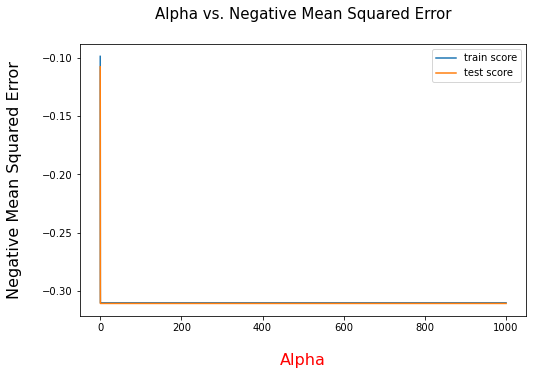

In [108]:
plt.figure(figsize=(8,5))
plt.plot(df_lasso['param_alpha'].astype('float32'), df_lasso['mean_train_score'])
plt.plot(df_lasso['param_alpha'].astype('float32'), df_lasso['mean_test_score'])
# Setting axis label and display parameters
plt.xlabel('Alpha',fontsize = 16, color = 'red', labelpad = 20)
plt.ylabel('Negative Mean Squared Error',fontsize = 16, color = 'black', labelpad = 20)    
# Setting title of the plot
plt.title("Alpha vs. Negative Mean Squared Error",color='black',fontsize=15, pad = 25)
plt.legend(['train score', 'test score'], loc='upper right')
# Showing the plot using matplotlib.pyplot show() function 
plt.show()

In [109]:
print('Intercept of Lasso Regression Model: ', lasso_best.intercept_)

Intercept of Lasso Regression Model:  11.646862426357998


In [110]:
y_train_predicted = lasso_best.predict(x_train_rfe_new)

In [111]:
lasso_mse_train = mean_squared_error(y_train, y_train_predicted)
lasso_rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
lasso_r2_score_train = r2_score(y_train, y_train_predicted)
print('MSE:', lasso_mse_train)
print('RMSE:', lasso_rmse_train)
print('R2 Score:', lasso_r2_score_train)

MSE: 0.02110770329400489
RMSE: 0.145284903875127
R2 Score: 0.8656795410037237


In [112]:
lasso_coef_df = pd.DataFrame()
# Getting the model coefficients
lasso_coef = list(lasso_best.coef_)
# Creating 'Features' column of dataframe and populating data
lasso_coef_df['Features'] = x_train_rfe_new.columns
# Creating 'Coefficient' column of dataframe and populating data 
lasso_coef_df['Coefficient'] = lasso_coef
# Diaplaying the dataframe of Regression model parameters
lasso_coef_df

,Features,Coefficient
0,OverallQual,1.152196e-01
1,BsmtFinSF1,-5.705906e-04
2,BsmtFinSF2,6.114194e-03
3,BsmtUnfSF,-0.000000e+00
4,TotalBsmtSF,-1.763664e-03
5,1stFlrSF,8.648205e-02
6,2ndFlrSF,5.813437e-02
7,LowQualFinSF,-1.988331e-03
8,GrLivArea,6.438955e-02
9,LotShape_IR3,-8.862479e-02


In [113]:
#getting the best 10 coeffecients
lasso_coef_df.reindex(lasso_coef_df['Coefficient'].abs().sort_values(ascending=False).index).head(10)

,Features,Coefficient
11,LandContour_Low,0.184309
43,Exterior2nd_VinylSd,0.179995
48,Foundation_Stone,0.179255
23,Neighborhood_Veenker,0.174444
28,BldgType_Twnhs,-0.167209
17,Neighborhood_MeadowV,-0.166246
31,Exterior1st_BrkFace,0.163243
20,Neighborhood_NridgHt,0.158130
15,Neighborhood_Crawfor,0.154852
40,Exterior2nd_CmentBd,0.154258


In [114]:
# Predicting the target variable on the test dataset
# Dropping the five most important predictor variables in the lasso model from x_test
x_test_rfe_new = x_test_rfe.drop(top_5, axis = 1)
# Perform prediction with rest predictor variables
y_test_predicted = lasso_best.predict(x_test_rfe_new)

In [115]:
lasso_mse_test = mean_squared_error(y_test, y_test_predicted)
lasso_rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predicted))
lasso_r2_score_test = r2_score(y_test, y_test_predicted)
print('MSE:', lasso_mse_test)
print('RMSE:', lasso_rmse_test)
print('R2 Score:', lasso_r2_score_test)

MSE: 0.028366754967609372
RMSE: 0.1684243300939902
R2 Score: 0.8278870638958786


Text(0, 0.5, 'Sales Price')

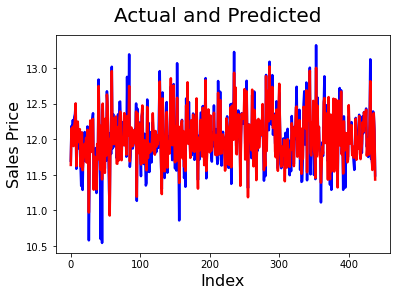

In [116]:
fig = plt.figure()
c = [i for i in range(0,y_test.shape[0],1)]
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_predicted, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16)                         # Y-label

In [117]:
data = {'Train':[lasso_mse_train,lasso_rmse_train,lasso_r2_score_train],
        'Test':[lasso_mse_test, lasso_rmse_test,lasso_r2_score_test]}
df_lasso_scores = pd.DataFrame(data,index=['Lasso_MSE','Lasso_RMSE','Lasso_R2Score'])
df_lasso_scores

,Train,Test
Lasso_MSE,0.021108,0.028367
Lasso_RMSE,0.145285,0.168424
Lasso_R2Score,0.865680,0.827887
